In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset = pd.read_csv('D:\\payoda\\hepatitis_csv.csv')

In [8]:
print(dataset.shape)

(155, 20)


In [10]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


# missing values 

In [11]:
## Here we will check the percentage of nan values present in each feature
##make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

In [12]:
## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

liver_big 0.0645  % missing values
liver_firm 0.071  % missing values
spleen_palpable 0.0323  % missing values
spiders 0.0323  % missing values
ascites 0.0323  % missing values
varices 0.0323  % missing values
bilirubin 0.0387  % missing values
alk_phosphate 0.1871  % missing values
sgot 0.0258  % missing values
albumin 0.1032  % missing values
protime 0.4323  % missing values


since there are some missing values we need to clear the missing values first

In [13]:
dataset.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

from this we can understand that most of them are objects there are only 2 bool and 5 float values

it is requiered to have numerical data, we will convert categorical data that has values no and yes to 0 and 1. Another important point to consider is to convert the binary survival variable (Class) encoded now as die, live to numerical categories 0 and 1.by using the function replace

In [14]:
dataset.head(50)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


we need to convert the categorical values into numerical for that we use replace function

In [15]:
replacements = {'False': 0,
               'True': 1,
               'die': 0,
               'live': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

dataset.replace(replacements, inplace = True)

we will convert all of our columns in the dataset to float type.

In [16]:
dataset = dataset.astype(float)

In [17]:
dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0.0,1.0
1,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0.0,1.0
2,78.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0.0,1.0
3,31.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0.0,1.0
4,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,1.0,0.0
151,44.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,NaN,1.0,1.0
152,61.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,NaN,1.0,1.0
153,53.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,1.0,1.0


now we have to check wheather our dataset is imblanced or not.....we will handle the nan values little further now we have to find what percentage of data belongs to each category 

In [19]:
total_of_patients = dataset.shape[0]
total_of_live_patients = (np.sum(dataset['class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(dataset['class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


from this we clearly know that our dataset is not clearly or perfectly balanced

now we can use describe function to see the details excluding NAN values as there are many true false stuffs we wont be using all the parameters or colunms

In [20]:
numerical_variables = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
dataset[numerical_variables].describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


We can observed that the patients belong to an age of 7-78 years, with a mean of 41.2 and a median of 39.There are missing values in most of the variables but in particular in protime where we only have 88 counts.we need to go through the mean of the different variables like the range goes from 1.42 (bilirubin) to 105.35 (alk_phosphate). Also, the variables sgot and alk_phosphate show a high standard deviation and their distribution would be right skewed due to the mean is higher than the median. The rest of the variables appear to be normally distributed mean approx median. The distribution of our variables is important to considered because they could affect lately on the algorithm that we use. So we need to transformation to fix the skewness observed

now we have to get the counts in every level 0 or 1 that which is false and true ) for each discrete variable in our dataset.

In [21]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0.0,1.0
1,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0.0,1.0
2,78.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0.0,1.0
3,31.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0.0,1.0
4,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0.0,1.0


In [22]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
dataset[categorical_variables].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


note: 0 is false and 1 is ture

 note: 0 is female and 1 is male 

from this sex in the dataset include more female than male patients.the variables antivirals, anorexia, ascites and varices include much more observations in the 0 than in the 1.

now from this we need to create some of the visualization for understanding more about the dataset 

as we need to study about the dataset at this point what are these terms are for like Enzymes such as Alkaline phosphatase (alk_phosphate) as well as Aspartate Aminotransferase (sgot) are normally produced in the liver which makes the liver for not working 

 it is also some kind of enzymes bilirubin, albumin and  Protime that can make the paitent liver to damaged state.

The presence of anorexia and ascites is also in patients with liver disease 

we have to see their relationship and explore if they could be important for our model.

our dataset contains a lot of NaN values

handling the missing values are must but as we dont know the importance of the values present in each columns and what is columns is basically used for wheather we can use the mean value instead  for NaN values.for now i just want to make some graphs so we are going to drop them but using the Pandas function .dropna() just a small snippet of program also i will write below the following graphs

In [24]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0.0,1.0
1,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0.0,1.0
2,78.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0.0,1.0
3,31.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0.0,1.0
4,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0.0,1.0


In [25]:
dataset_analytic = dataset.dropna()
xvalues = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
dataset_analytic = dataset_analytic[xvalues]
dataset_analytic.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


the function displot allow as to plot a univariate distribution of observations. It is possible to plot both histograms side by side by using the function subplot of matplotlib.

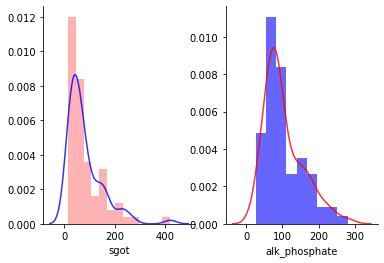

In [31]:
plt.subplot(1, 2, 1)
sns.distplot(dataset_analytic['sgot'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"red","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(dataset_analytic['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"blue","alpha":0.6})
sns.despine();

now we have to find for next 2 

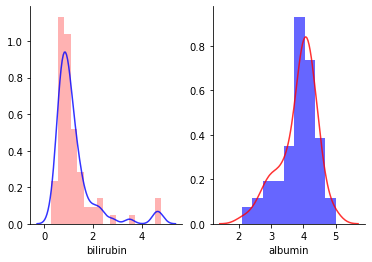

In [32]:
plt.subplot(1, 2, 1)
sns.distplot(dataset_analytic['bilirubin'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"red","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(dataset_analytic['albumin'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"blue","alpha":0.6})
sns.despine();

now we have to do for protime also

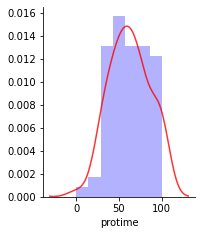

In [34]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(dataset_analytic['protime'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"blue","alpha":0.3})
sns.despine();

from these diagrams we can know that sgot and alk_phosphate has a little degree of skewness to fix that wee need to use a log tranformation

In [35]:
dataset_analytic[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = dataset_analytic[['albumin','alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)

In [36]:
dataset_analytic.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


now we can use the pairplot function to visualize the relationship between the different numerical variables.we are trying to identify the paitents who are living or dead (0 or 1)

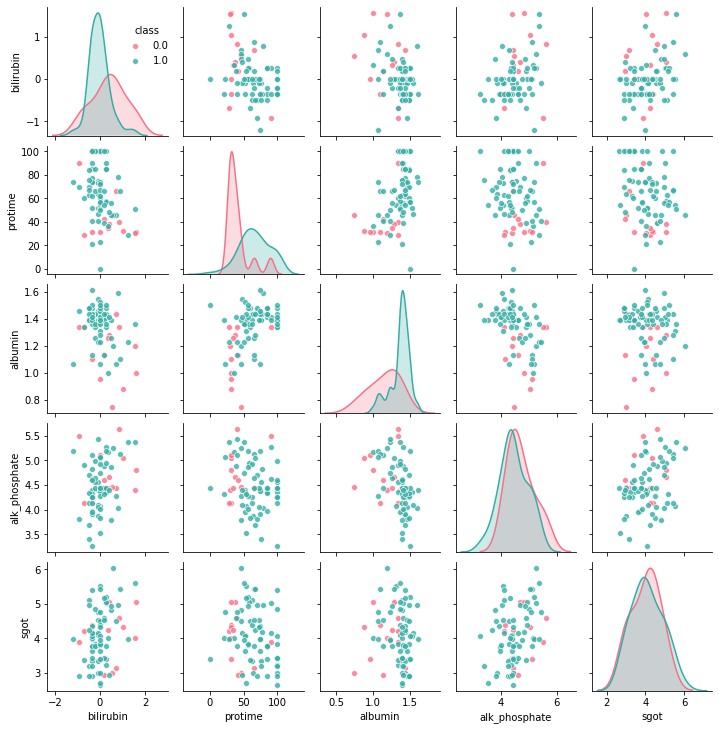

In [39]:
g = sns.pairplot(dataset_analytic, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

from these images we got we can come to the conclusion that 
From the histograms we see that the skewness present in our data was fixed properly
We can see that in some our variables patients tend to have to whether they belong to false 0 or true 1 however this is not  clear.

and there is no linear relationship beetween the plots created

we can also check the relationship between the categorical variables and the numberical variables by using pair plot as well as swarmplot it is also like scatter plot which will not overlap as much

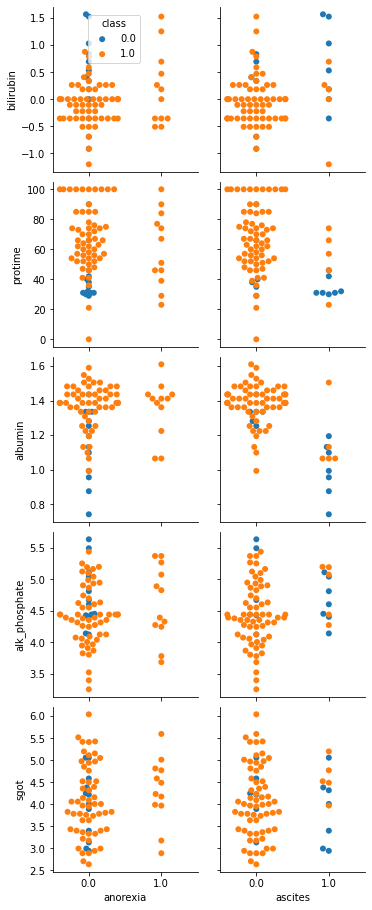

In [42]:
graph = sns.PairGrid(dataset_analytic,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

there is no difference in the variables plotted regarding the anorexia

not only patients from both levels of class are distributed randomly and there is not difference in the variables analyzed regarding the levels of anorrexia

we can see a trend that patients with class 0 tend to have ascites

now we will see if there is any strong correlation between the parameters by using a Pearson correlation coefficient because it is a good option to know the strength of the linear relationship between two variables.performing correlation analysis is our dataset if that has highly correlated variables may cause some error in the model and it could provide little extra information knowing if our variables display a linear relationship can help us choose which machine learning algorithm is more suitable for our data

we can also use pair plot to select the machine learning algorithms

for performing correlation we need to apply factorize function first to the columns containing non continuos variables in order to obtain a numeric values of the categorical values in the dataset.

In [44]:
dataset[categorical_variables] = dataset[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [45]:
corr = dataset.dropna().corr(method = 'pearson')

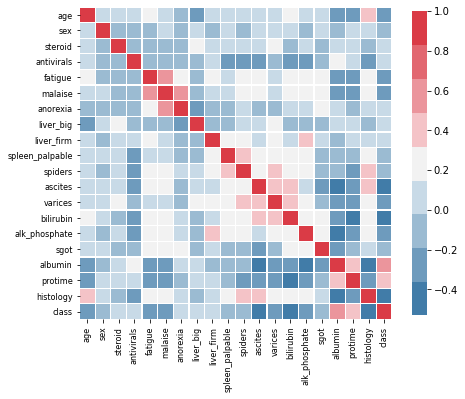

In [46]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);

We can observe in the heatmap that some of the variables show a coefficient of ~0.6 or -0.4, but most of them display a very low correlation coefficient. So we can conclude that there is no strong linear correlation between our variables.

why i didnt perform missing values ?

The first step is to understand why data went missing. In our case, we can guess that the values missing in the categorical variables could be due to the absence of the feature that instead of being imputed as 'no' was left blank or that it was not tested. Also, missing values in continuous variables could be explained by the lack of studies performed in that particular patient or because the parameters were within normal range and it was not written down.so better we can drop the NAN  values